# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [2]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

In [ ]:
import wave

with wave.open('*.wav', 'rb') as wav_file:
    channels = wav_file.getnchannels() #Количество каналов
    sample_width = wav_file.getsampwidth() #Битовая глубина
    framerate = wav_file.getframerate() #Частота дискретизации
    n_frames = wav_file.getnframes() #Количество samples
    duration = n_frames / framerate #Длительность аудио

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [5]:
import wave
with wave.open('lab1.wav', 'rb') as wav_file:
    channels = wav_file.getnchannels() #Количество каналов
    sample_width = wav_file.getsampwidth() #Битовая глубина
    framerate = wav_file.getframerate() #Частота дискретизации
    n_frames = wav_file.getnframes() #Количество samples
    duration = n_frames / framerate #Длительность аудио
print(channels)
print(sample_width)
print(framerate)
print(n_frames)
print(duration)

1
2
48000
399360
8.32


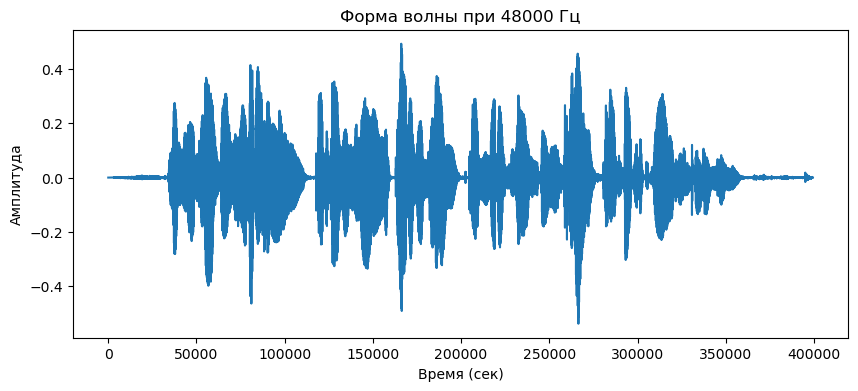

Оригинальная запись: 48000 Гц


In [6]:
#чтение оригинального файла
import librosa
import soundfile as sf
from IPython.display import Audio

file_path = 'lab1.wav'
y, sr = librosa.load(file_path, sr=None)

#Форма волны оригинального файла
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title('Форма волны при 48000 Гц')
plt.xlabel('Время (сек)')
plt.ylabel('Амплитуда')
plt.show()

print(f"Оригинальная запись: {sr} Гц")
Audio(y, rate=sr)

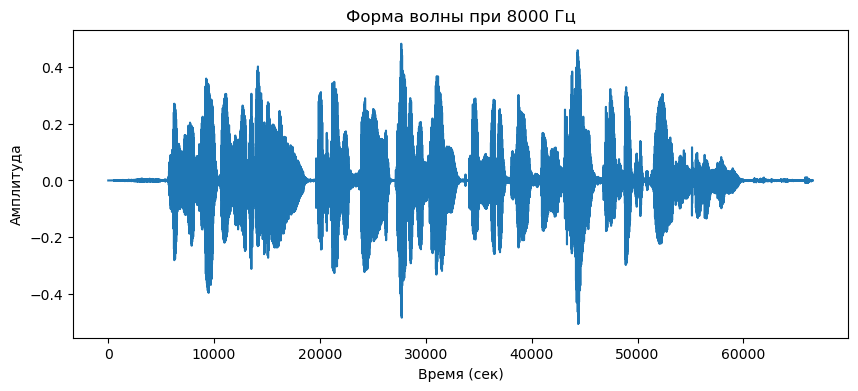

In [7]:
#Изменение частоты дискретизации
new_sr = 8000
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=new_sr)

#Форма волны сигнала с частотой дискретизации 8000
plt.figure(figsize=(10, 4))
plt.plot(y_resampled)
plt.title(f'Форма волны при {new_sr} Гц')
plt.xlabel('Время (сек)')
plt.ylabel('Амплитуда')
plt.show()

Audio(y_resampled, rate=new_sr)

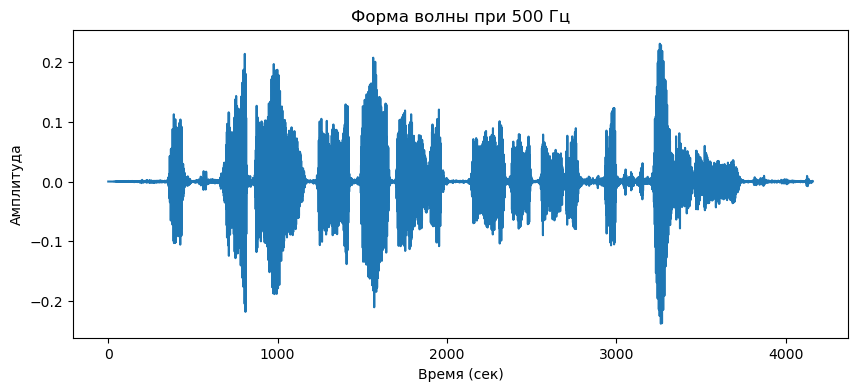

In [8]:
#Изменение частоты дискретизации на 500
new_sr = 500
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=new_sr)

#Форма волны сигнала с частотой дискретизации 500
plt.figure(figsize=(10, 4))
plt.plot(y_resampled)
plt.title(f'Форма волны при {new_sr} Гц')
plt.xlabel('Время (сек)')
plt.ylabel('Амплитуда')
plt.show()

Audio(y_resampled, rate=new_sr)
sf.write('resampled_audio.wav', y_resampled, new_sr)
#Примерно на этой частоте пропадает возможность разобрать человеческую речь

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

Форматы аудиофайлов, такие как .wav, .mp3, и .ogg, различаются по типу сжатия, качеству звука и применению. 
1. WAV (.wav) - Тип сжатия: Без сжатия (lossless), поэтому возможно хранение очень высокого качество звука, так как хранит аудиоданные в исходном виде. Как следствие, большие размеры файлов. Используется там, где важно сохранить максимальное качество звука, например в профессиональной звукозаписи и аудиомонтаже. Подходит для последующей обработки, редактирования.  WAV может поддерживать любые частоты дискретизации (например, 44.1 кГц, 48 кГц) и битрейт (например, 16 бит, 24 бит), что делает его универсальным для профессиональной работы.
2. MP3 (.mp3) - Тип сжатия: Сжатие с потерями (lossy). Умеренно высокое качество звука, но качество зависит от битрейта. При низком битрейте (128 kbps или ниже) звук может заметно ухудшиться, особенно в высокочастотных областях. Значительно меньше файлы, чем у WAV, благодаря сжатию. Широко используется для музыки и подкастов, когда важно сохранить хорошее качество звука при уменьшении размера файла. Удобен для потоковой передачи и хранения на устройствах с ограниченной памятью. Битрейт: Обычно от 128 kbps до 320 kbps, где 320 kbps приближено по качеству к CD-записи.
3. OGG Vorbis (.ogg) - аналогичен MP3. Но имеет более эффективное сжатие по сравнению с MP3. При том же битрейте качество OGG обычно выше.

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [17]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10, 
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k', 
        linewidth = 1)
    plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
    plt.show()

In [18]:
# Читаем данные с подготовленными сигналами
import pickle
with open("data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

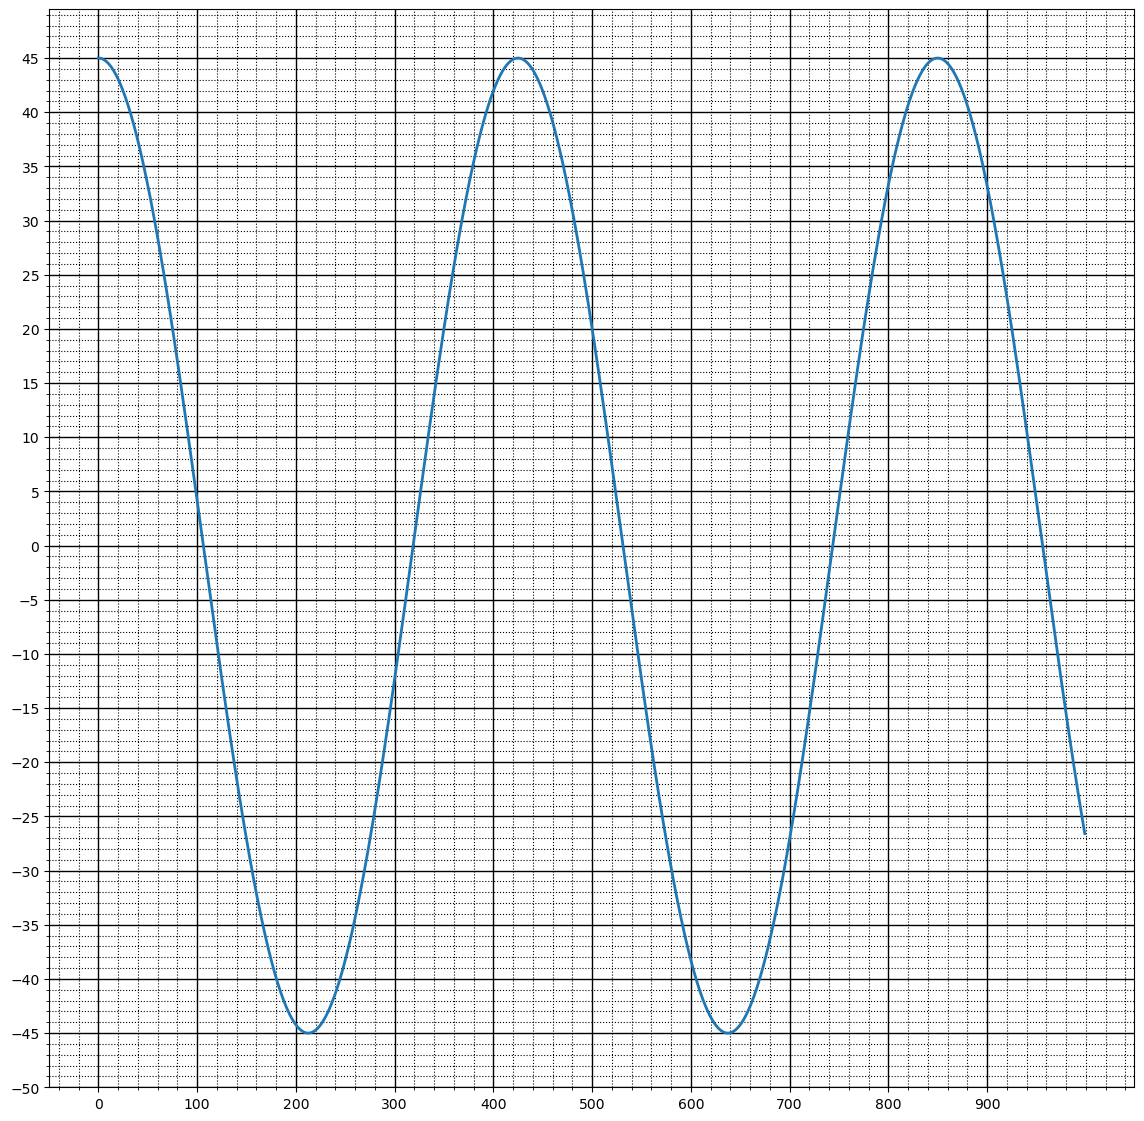

In [19]:
draw_signal(test_data['task2']['a'])

In [21]:
t = np.arange(1000)
A, T, phi = 45, 425, 0
a = A * np.cos(2 * np.pi * t / T + phi)

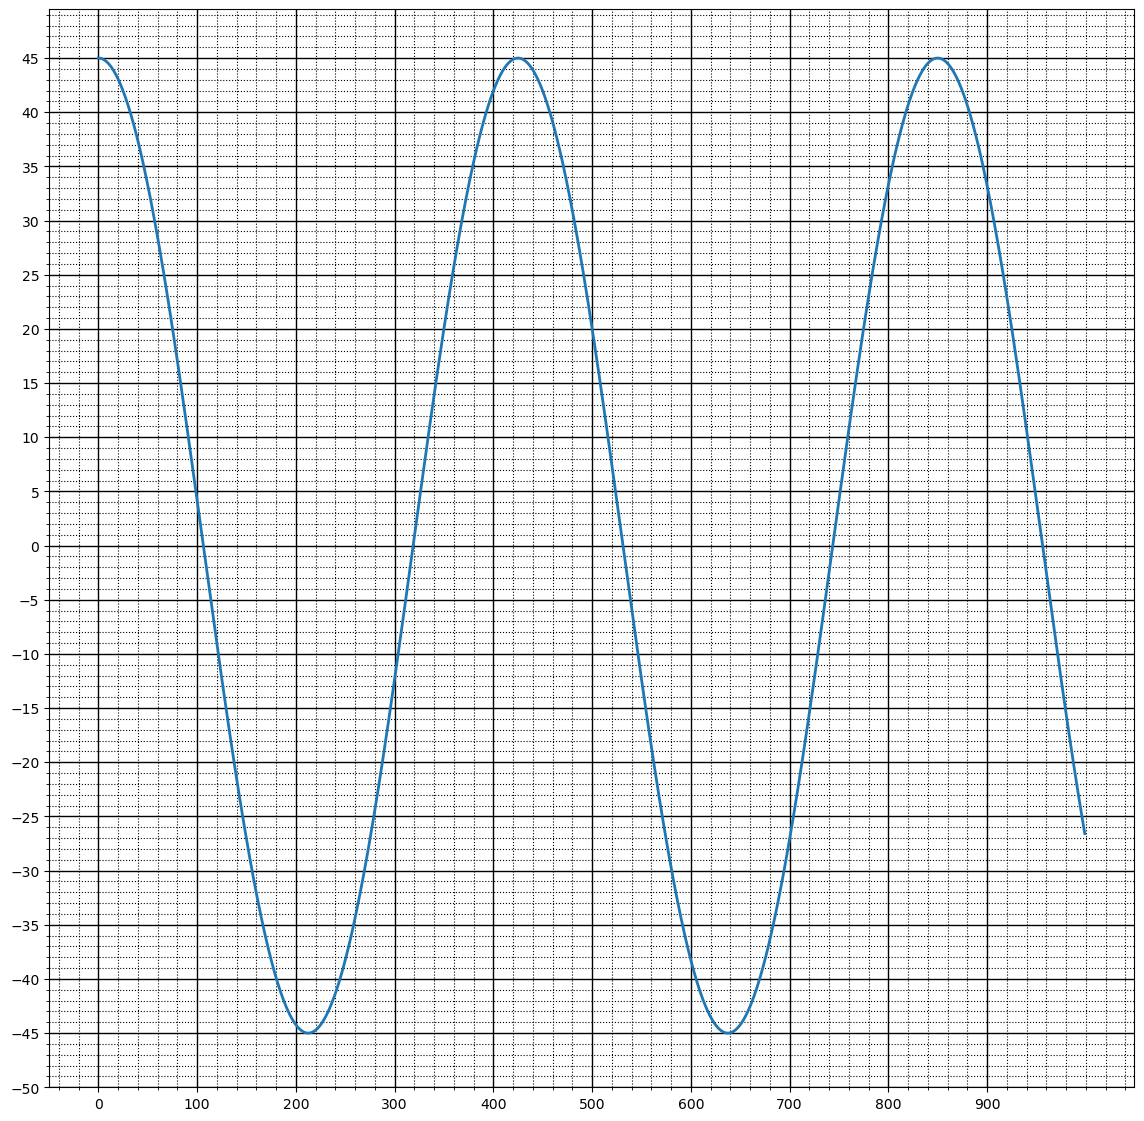

In [22]:
draw_signal(a)

In [23]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 0.015$

3. Фаза - $\phi= 0$

### Сигнал ***b***

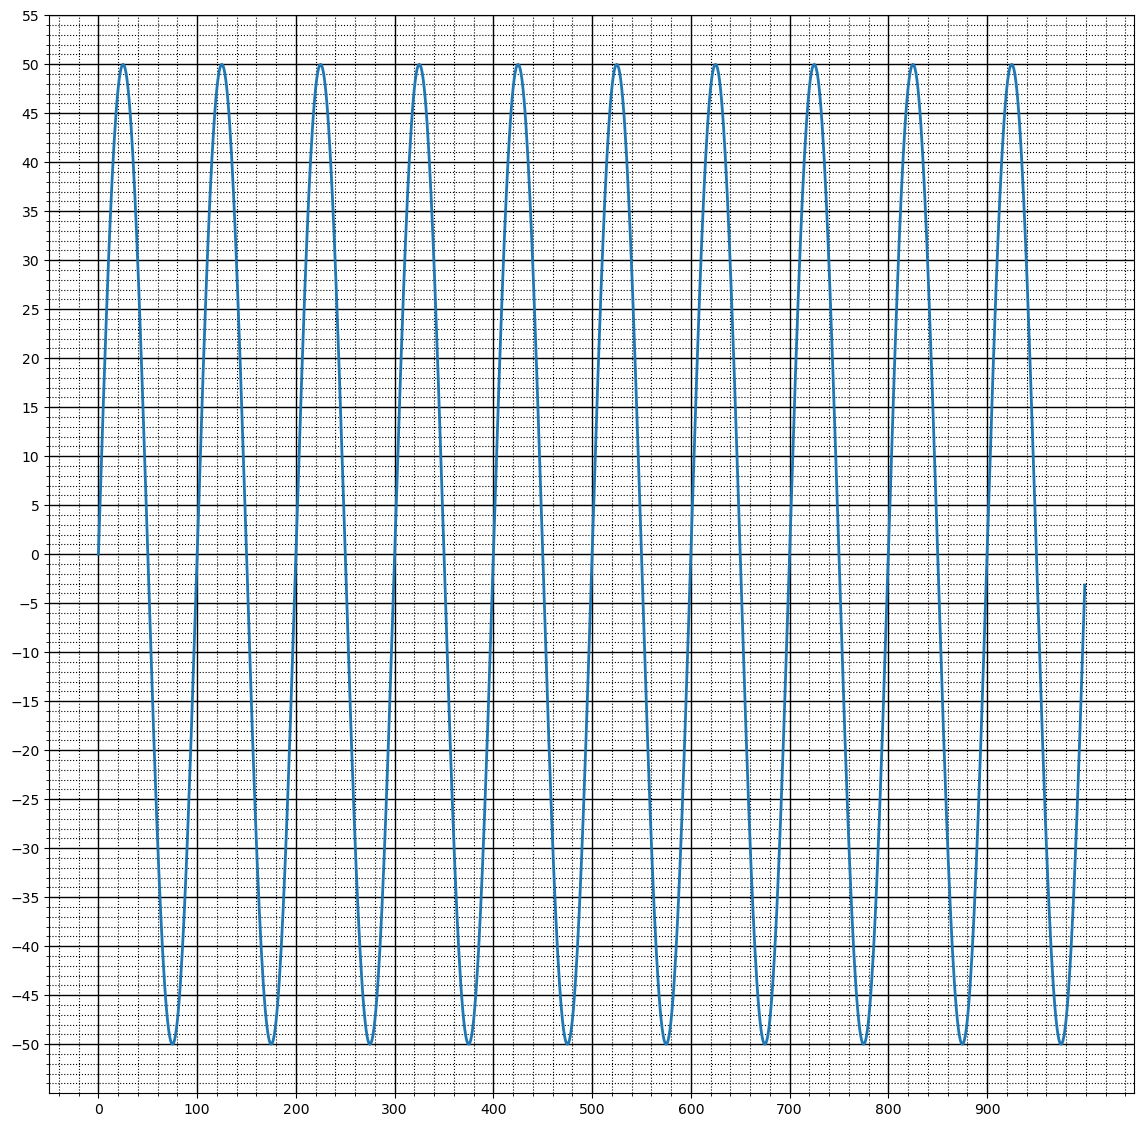

In [51]:
draw_signal(test_data['task2']['b'])

In [52]:
A, T, phi = 50, 100, 0
b = A * np.sin(2 * np.pi * t / T + phi)

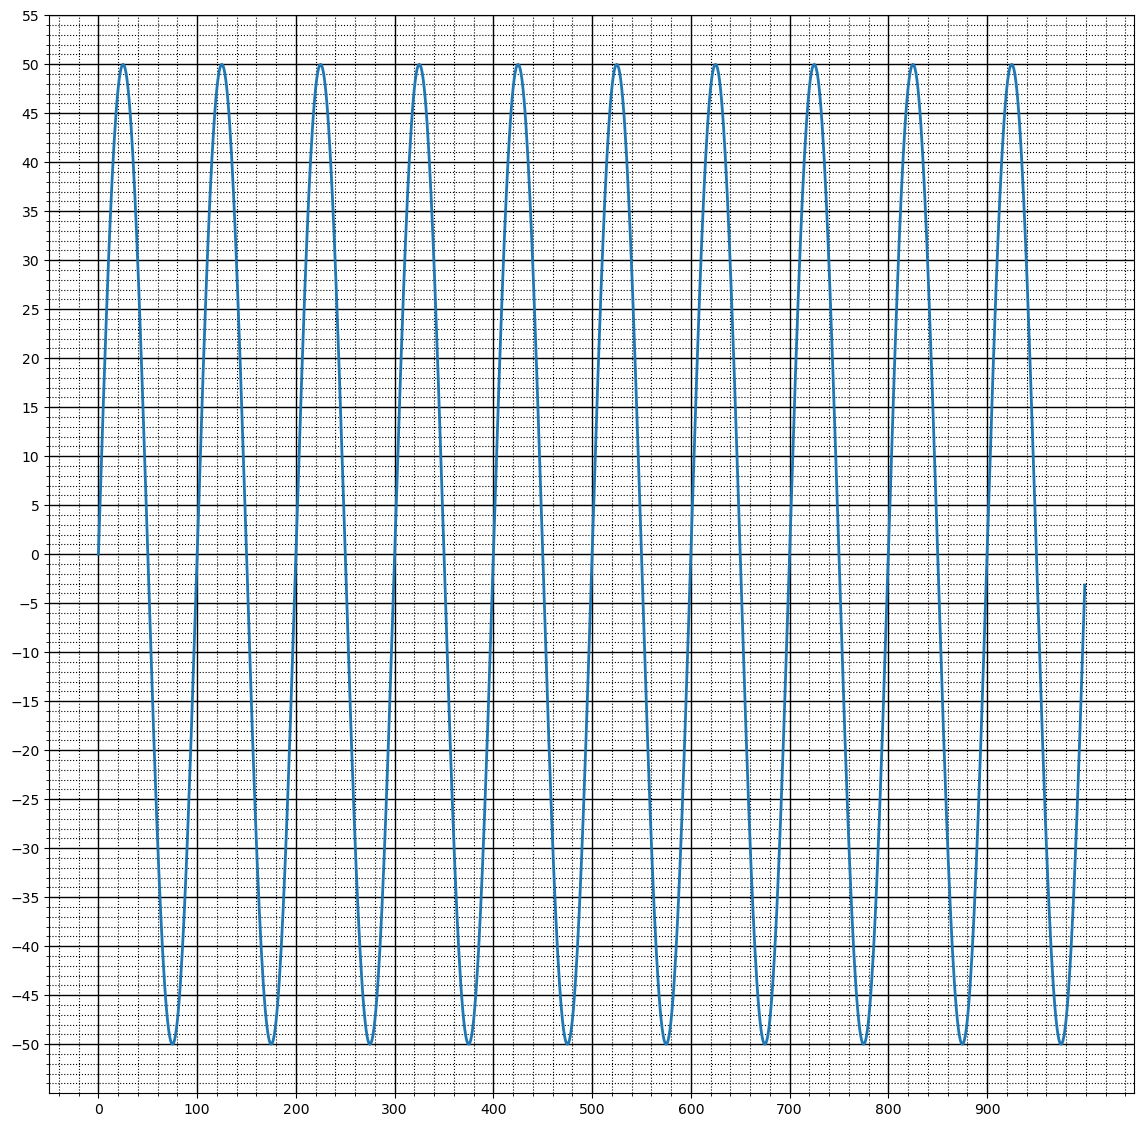

In [53]:
draw_signal(b)

In [54]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 0.0628$

3. Фаза - $\phi= 0$

### Сигнал ***c***

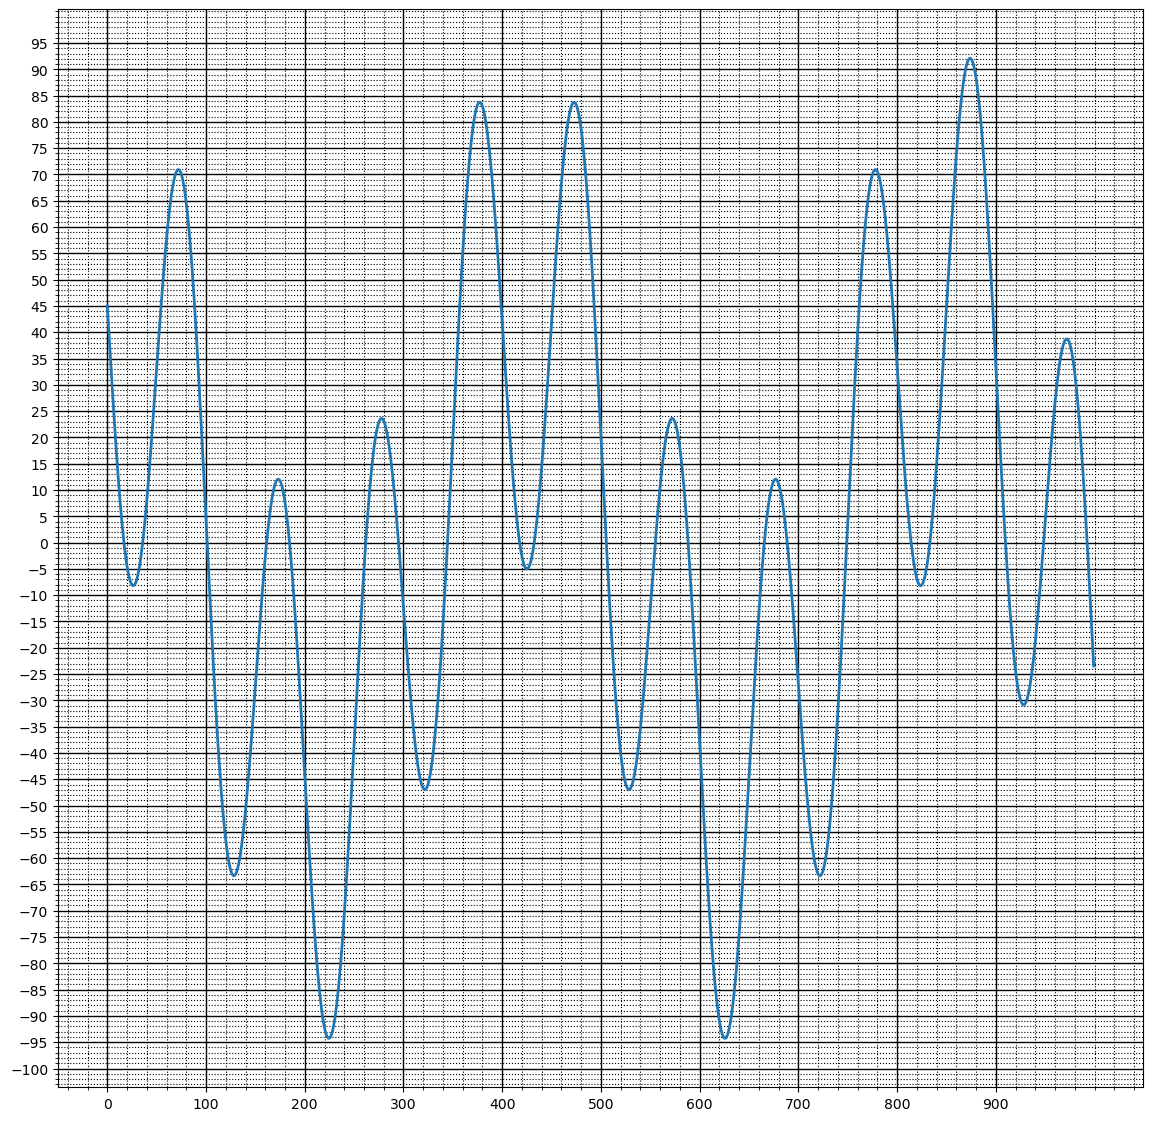

In [24]:
draw_signal(test_data['task2']['c'])

In [27]:
# сигнал состоит из двух гармоник
A1, T1, phi1 = 89, 400, 18
A2, T2, phi2 = 39.5, 100, 5.5

с = A1 * np.sin(2 * np.pi * t / T1 + phi1) + A2 * np.cos(2 * np.pi * t / T2 + phi2)

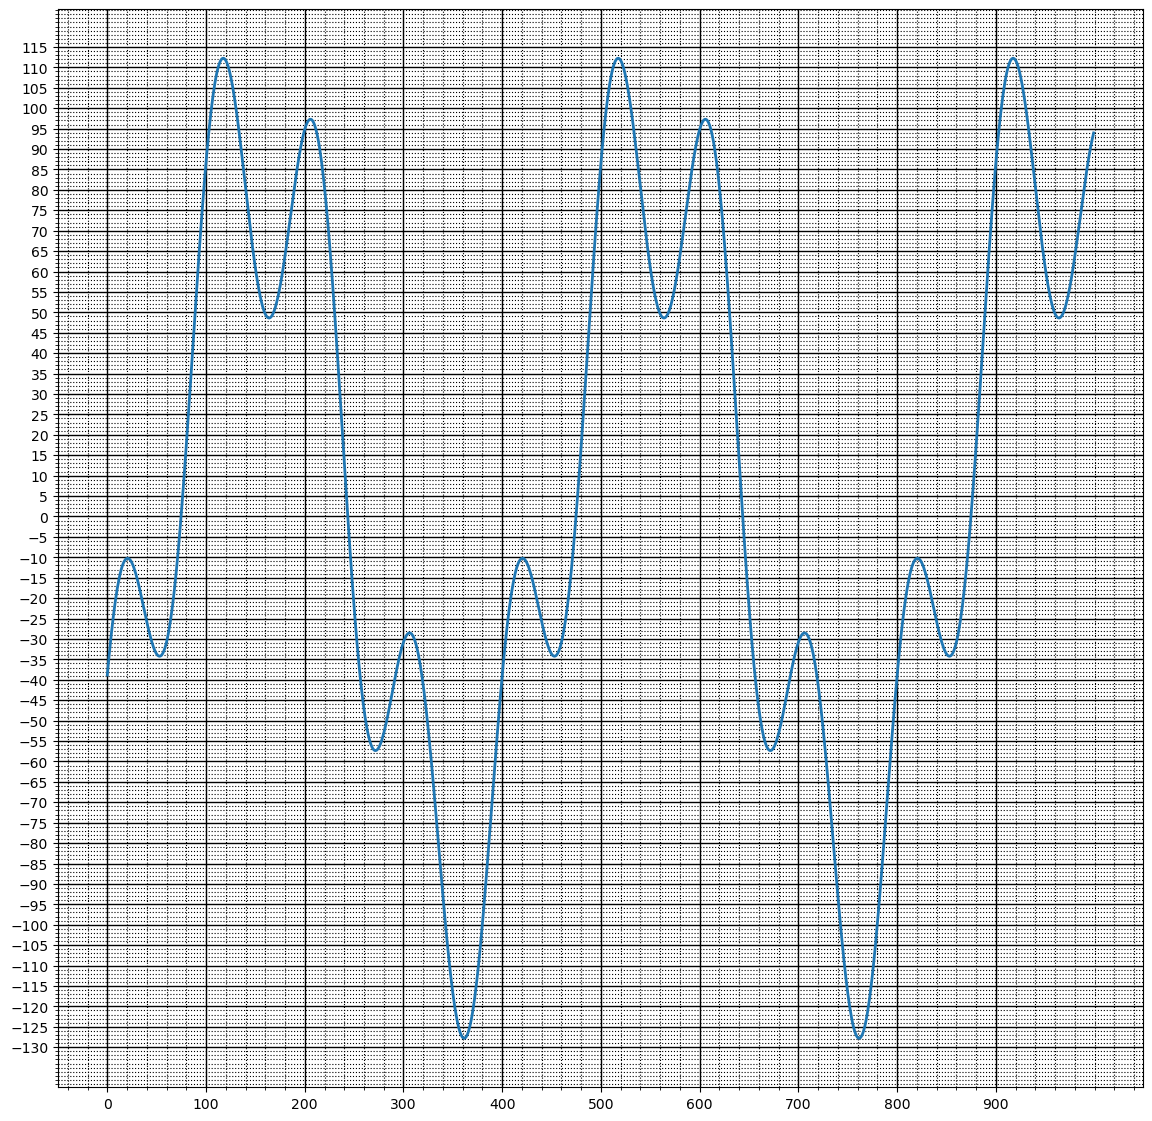

In [29]:
draw_signal(с)

In [ ]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [81]:
def convolve(in1, in2):
    len_in1 = len(in1)
    len_in2 = len(in2)
    
    len_out = len_in1 + len_in2 - 1
    
    out = np.zeros(len_out)
    
    for i in range(len_out):
        for j in range(len_in2):
            if i - j >= 0 and i - j < len_in1:
                out[i] += in1[i - j] * in2[j]
    
    return out

In [85]:
import scipy
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [86]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [87]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

C:\Users\79214\AppData\Local\Temp\ipykernel_20956\3160161680.py:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(a, use_line_collection=True)


Text(0, 0.5, 'Амплитуда')

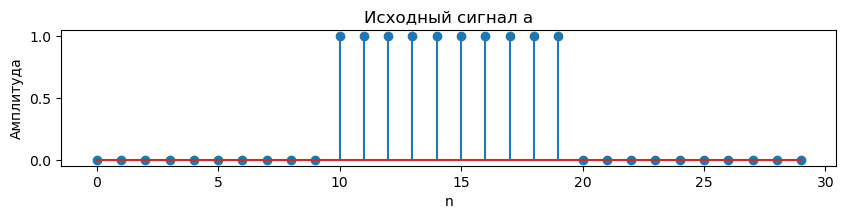

In [95]:
result = convolve(a,b)

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.stem(a, use_line_collection=True)
plt.title('Исходный сигнал a')
plt.xlabel('n')
plt.ylabel('Амплитуда')

Сигнал **b**

C:\Users\79214\AppData\Local\Temp\ipykernel_20956\2194496393.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(b, use_line_collection=True)


Text(0, 0.5, 'Амплитуда')

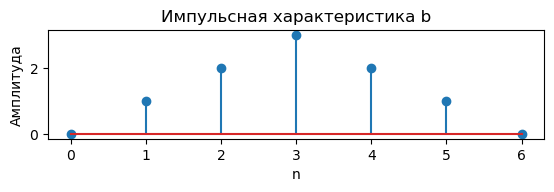

In [94]:
plt.subplot(3, 1, 2)
plt.stem(b, use_line_collection=True)
plt.title('Импульсная характеристика b')
plt.xlabel('n')
plt.ylabel('Амплитуда')

Свертка **a** и **b**

C:\Users\79214\AppData\Local\Temp\ipykernel_20956\2425466812.py:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(result, use_line_collection=True)


Text(0, 0.5, 'Амплитуда')

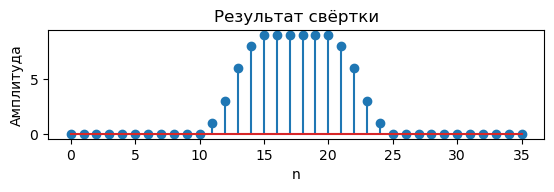

In [96]:
plt.subplot(3, 1, 3)
plt.stem(result, use_line_collection=True)
plt.title('Результат свёртки')
plt.xlabel('n')
plt.ylabel('Амплитуда')

Все 3 графика на одной картинке:

C:\Users\79214\AppData\Local\Temp\ipykernel_20956\289080013.py:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(a, use_line_collection=True)
C:\Users\79214\AppData\Local\Temp\ipykernel_20956\289080013.py:12: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(b, use_line_collection=True)
C:\Users\79214\AppData\Local\Temp\ipykernel_20956\289080013.py:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they sh

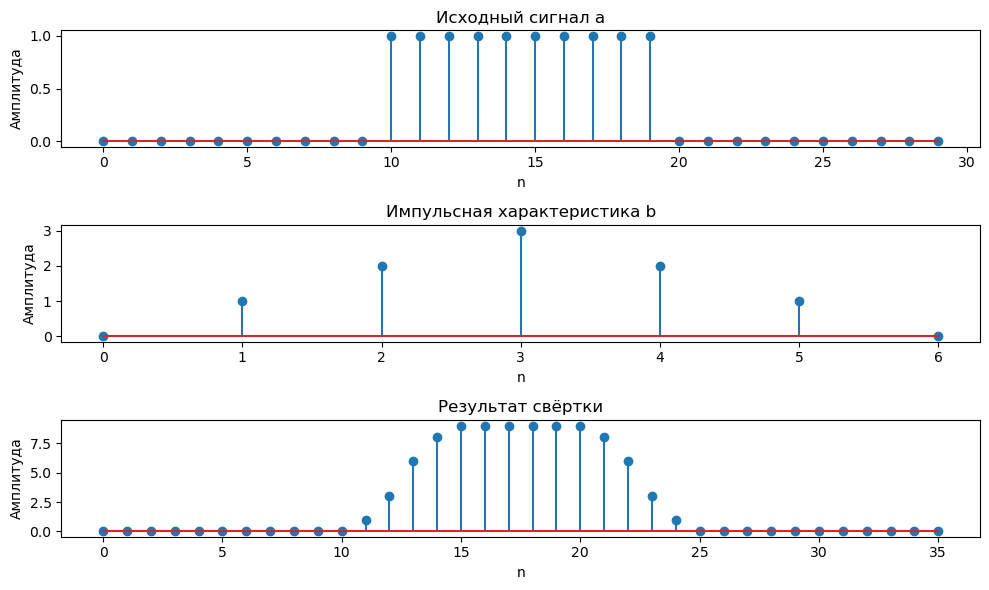

In [97]:
result = convolve(a,b)

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.stem(a, use_line_collection=True)
plt.title('Исходный сигнал a')
plt.xlabel('n')
plt.ylabel('Амплитуда')

plt.subplot(3, 1, 2)
plt.stem(b, use_line_collection=True)
plt.title('Импульсная характеристика b')
plt.xlabel('n')
plt.ylabel('Амплитуда')

plt.subplot(3, 1, 3)
plt.stem(result, use_line_collection=True)
plt.title('Результат свёртки')
plt.xlabel('n')
plt.ylabel('Амплитуда')

plt.tight_layout()
plt.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

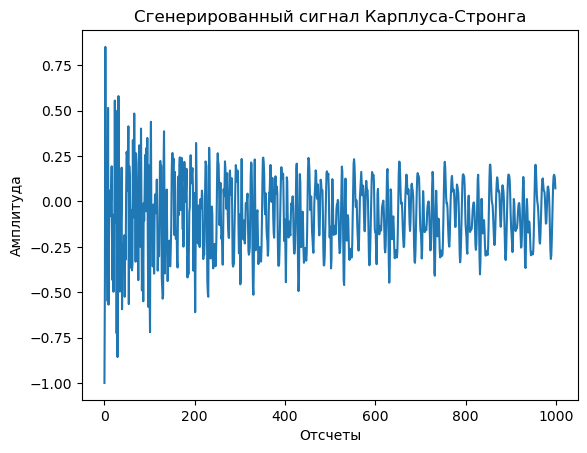

In [4]:
import sounddevice as sd

def karplus_strong(noise, N):
    # Noise - input
    # N - number of samples to generate
    # return y - generated signal based on Noise 
    y = np.zeros(N)
    y[:len(noise)] = noise
    for i in range(len(noise), N):
        y[i] = 0.5 * (y[i - len(noise)] + y[i - len(noise) - 1])
    return y

sample_rate = 44100
duration = 2 
N = sample_rate * duration
string_length = 100
noise = np.random.randn(string_length)

#Генерируем сигнал
signal = karplus_strong(noise, N)
signal /= np.max(np.abs(signal))

#Отрисовка сигнала
plt.plot(signal[:1000])
plt.title('Сгенерированный сигнал Карплуса-Стронга')
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.show()

sd.play(signal, sample_rate)
sd.wait()

# Сохранение звука в файл
# from scipy.io.wavfile import write
# write("karplus_strong.wav", sample_rate, (signal * 32767).astype(np.int16))


In [9]:
np.random.seed(seed=1)
sample_rate = 44100 
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency))) # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)], noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0])/2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)], \
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

All Ok!


### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [ ]:
# YOUR CODE HERE

Визуализируем затухание амплитуды:

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [ ]:
# YOUR CODE HERE